In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [77]:
df = pd.read_csv('Life Expectancy Data.csv')

Data Summary


In [78]:
df.shape

(2938, 22)

In [79]:
df.head(1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [81]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [82]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


EDA

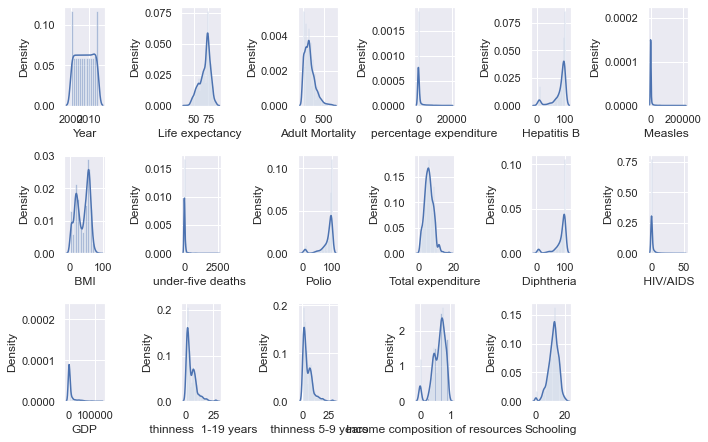

In [83]:
columns=['Year', 'Life expectancy ', 'Adult Mortality',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

for column,i in zip(columns,range(len(columns))):
    plt.subplot(6,6,i+1)
    sns.distplot(df[column])  
    plt.tight_layout()
    sns.set(rc={'figure.figsize':(20,20)})

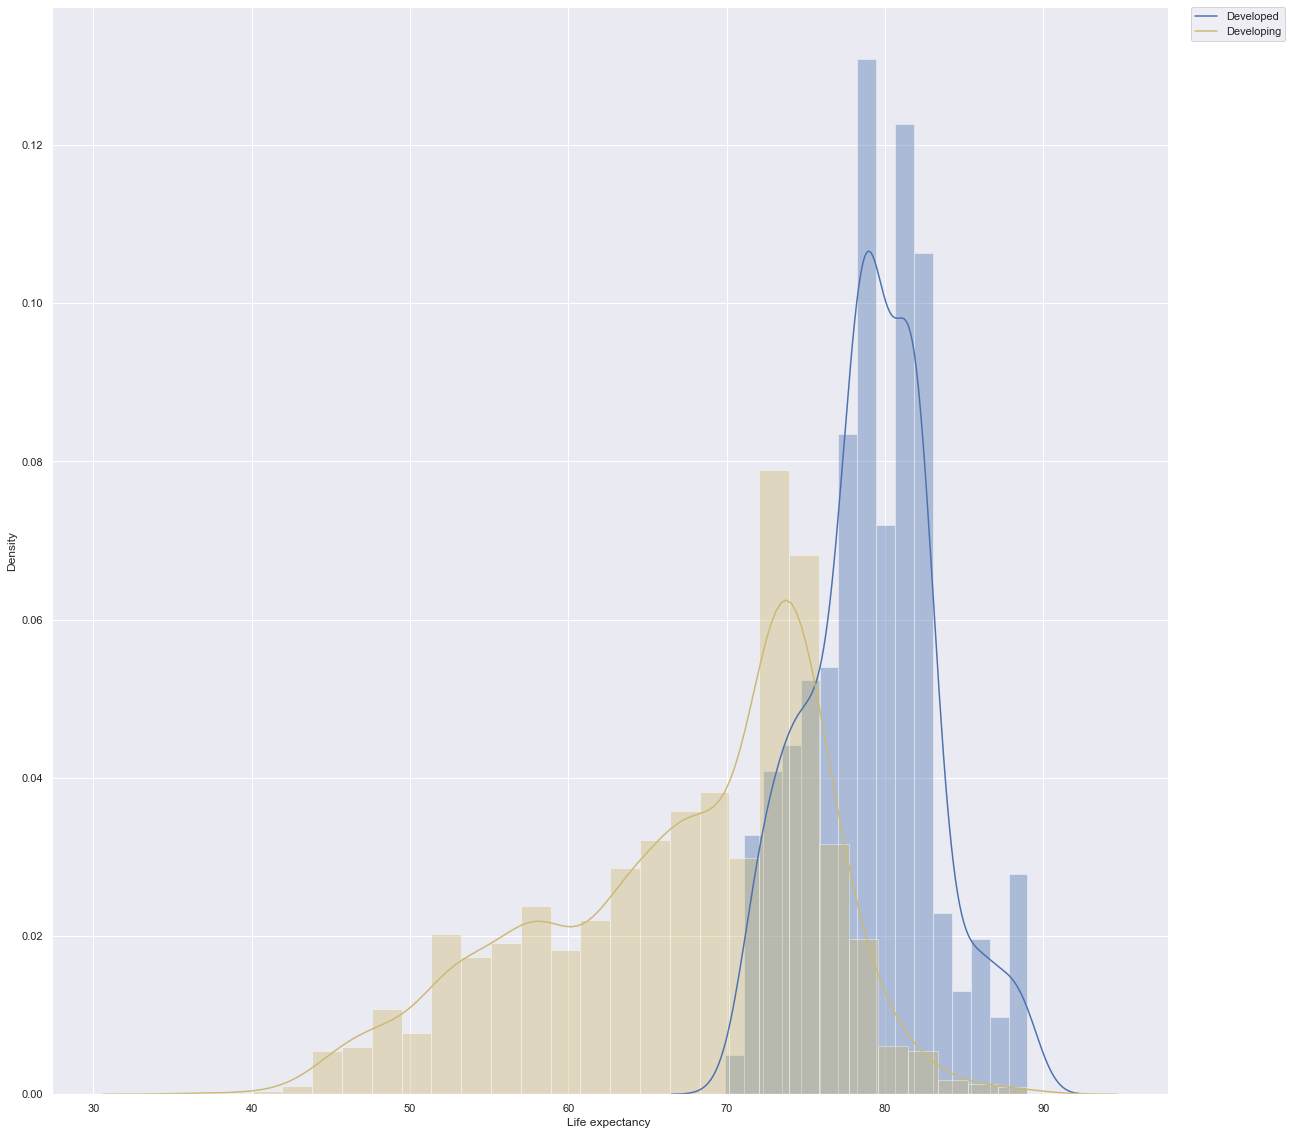

In [84]:
sns.distplot(df[df['Status']=='Developed']['Life expectancy '])
sns.distplot(df[df['Status']=='Developing']['Life expectancy '],color='y')
labels=['Developed','Developing']
plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(10,12)})
plt.show()

Correlation

<AxesSubplot:>

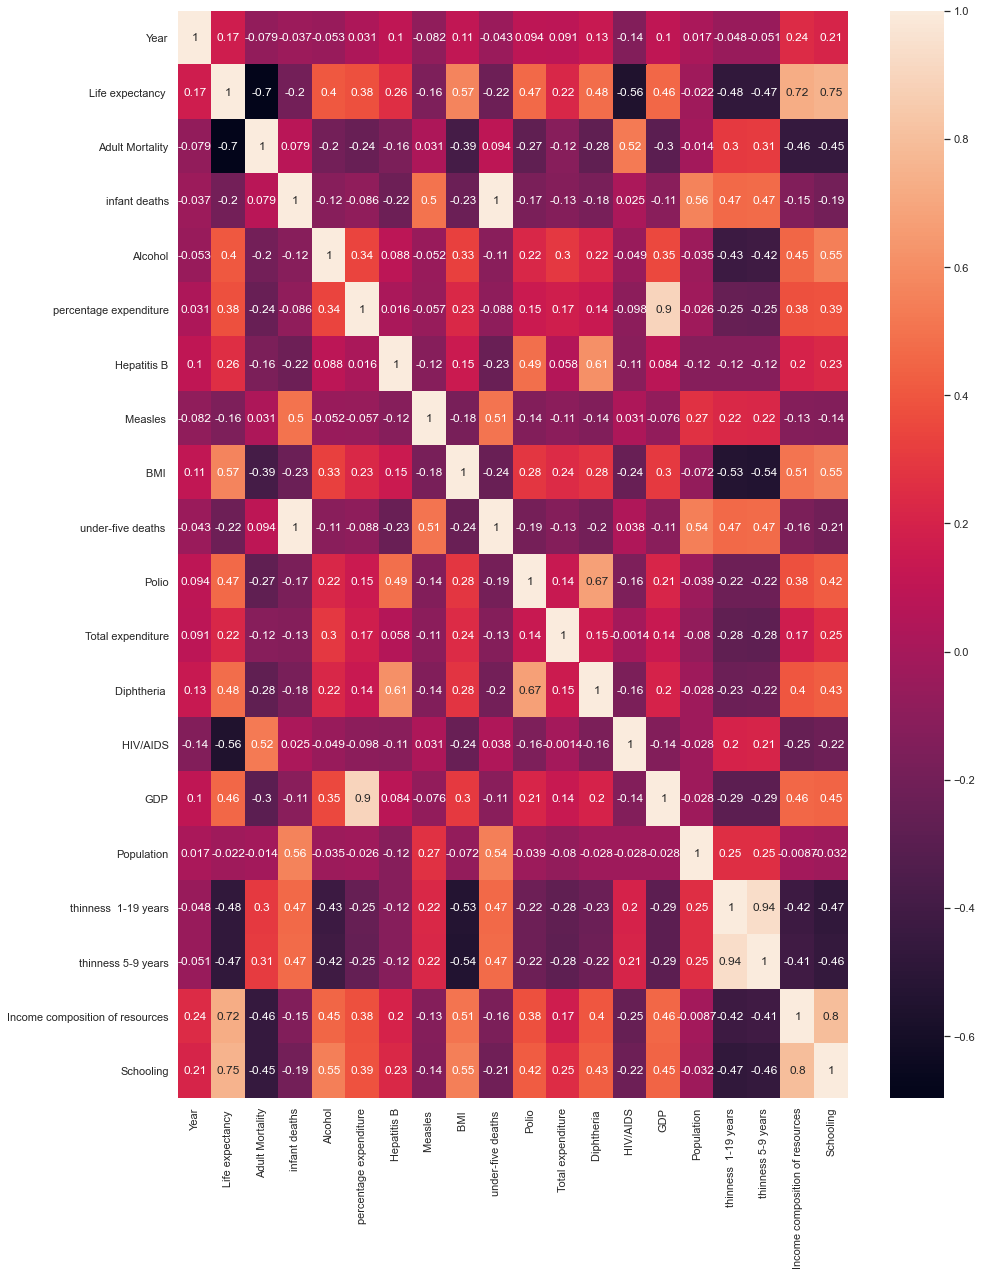

In [85]:
fig, ax = plt.subplots(figsize = (15,20)) 

corr = df.corr() 
sns.heatmap(corr, annot = True) 

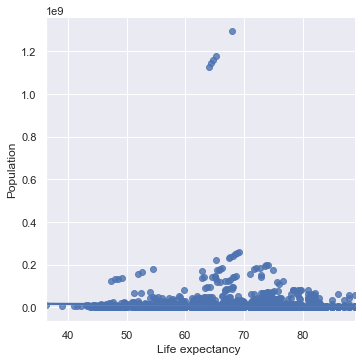

In [86]:
sns.lmplot(x ='Life expectancy ', y= 'Population' , data=df)
plt.show()

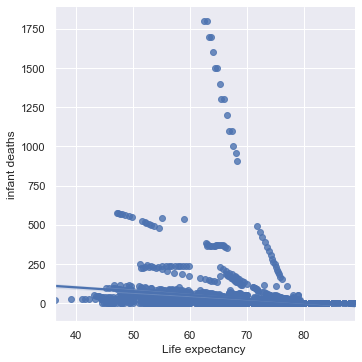

In [87]:
sns.lmplot(x ='Life expectancy ', y='infant deaths' , data=df)
plt.show()

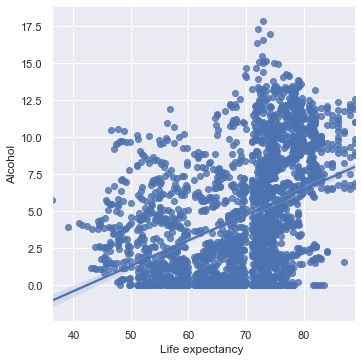

In [88]:
sns.lmplot(x ='Life expectancy ', y='Alcohol' , data=df)
plt.show()

Data processing

In [89]:
df.drop(columns =['Alcohol', 'infant deaths','Population'], inplace=True)

In [90]:
df.dropna(axis = 0 , inplace=True)

In [91]:
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.lstrip()

In [17]:
#df['Schooling'].fillna(df['Schooling'].median())
#df['Schooling']=df['Schooling'].fillna(df['Schooling'].median())
#df['Total expenditure']=df['Total expenditure'].fillna(df['Total expenditure'].median())
#df['Income composition of resources']=df['Income composition of resources'].fillna(df['Income composition of resources'].median() )
#df['Life expectancy']=df['Life expectancy'].fillna(df['Life expectancy'].median() )

# Data is sensitive so null values are omitted

In [92]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

#Dummy Variables

In [93]:
df = pd.get_dummies(df)

In [94]:
df.head(1)

,Year,Life expectancy,Adult Mortality,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,65.0,263.0,71.279624,65.0,1154,19.1,83,6.0,8.16,...,0,0,0,0,0,0,0,0,0,1


Baseline Linear Regression

In [95]:
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=1000)

X_test =  testing_data.drop(['Life expectancy'],axis =1)
y_test=  testing_data['Life expectancy']

X_training =  training_data.drop(['Life expectancy'],axis =1)
y_training =  training_data['Life expectancy']


print("X_train shape: ",X_training.shape)
print("y_train shape: ",y_training.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (1482, 165)
y_train shape:  (1482,)
X_test shape:  (371, 165)
y_test shape (371,)


In [96]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_training, y_training)
predictions = lm.predict(X_test)

In [97]:
predictions[0:5]

array([66.89748493, 74.06726388, 59.97663171, 75.08753255, 82.12340291])

In [98]:
from sklearn import metrics
print('Train score: {:.4f}'.format(model.score(X_training, y_training)))
print('Test score: {:.4f}'.format(model.score(X_test, y_test)))
MSE = np.square(np.subtract(y_test,  predictions)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.9687
Test score: 0.9524
MSE: 3.6122


RandomForestRegressor

In [99]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
regressor.fit(X_training, y_training) 

RandomForestRegressor(random_state=0)

In [100]:
predictions1 = regressor.predict(X_test)

In [101]:
print('Train score: {:.4f}'.format(regressor.score(X_training, y_training)))
print('Test score: {:.4f}'.format(regressor.score(X_test, y_test)))
MSE = np.square(np.subtract(y_test,predictions1)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.9940
Test score: 0.9625
MSE: 2.8494


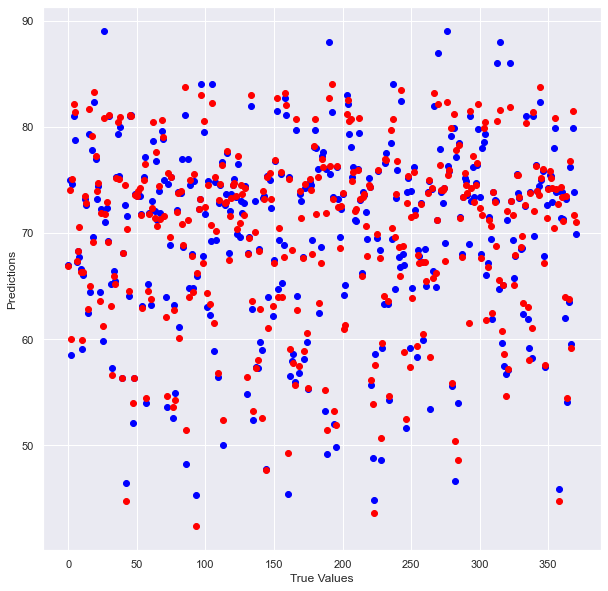

In [102]:
def plotGraph(y_test,predictions1):
    fig, ax = plt.subplots(figsize = (10,10)) 
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(predictions1)),predictions1, color='red')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

plotGraph(y_test,  predictions)

